In [1]:
#-------------------------------------------------------#
#Este programa tem como objetivo exibir um DataFrame do fundo imobiliário específico#
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
import yfinance as yf
import fundamentos as fts
yf.pdr_override()
ibov = web.get_data_yahoo('^BVSP')
# 1.0.0 - O Fundo escolhido é o MXRF11, abaixo é o código que extrai as informações do Yahoo Finance e gera uma tabela inicial com as informações.
# 1.0.1 - Podemos usar o comando interval dentro do web.getdatayahoo para filtrar as informações seguindo um intervalo específico de tempo
# 1.0.2 - Podemos criar uma variável auxiliar chamada today para usar o comando date.today() que nos permite executar o star ou o end usando o dia de hoje como parâmetro de variação.
from datetime import date
today = date.today()
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end=today, interval='1mo')
type(mxrf11)
mxrf11

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,11.60,11.64,11.10,11.20,11.20,9004152
2020-03-01,11.21,11.42,7.71,10.16,10.16,10956600
2020-04-01,10.00,10.19,9.11,10.13,10.13,8583248
2020-05-01,10.13,10.97,9.81,10.83,10.83,7873646
2020-06-01,10.78,11.03,10.70,10.99,10.99,13696253
2020-07-01,10.98,11.02,10.80,10.95,10.95,12393338
2020-08-01,10.88,10.90,10.35,10.67,10.67,15172874
2020-09-01,10.60,10.99,10.20,10.91,10.91,12574300
2020-10-01,10.78,10.80,10.33,10.41,10.41,23049865


Text(0, 0.5, 'Cotação')

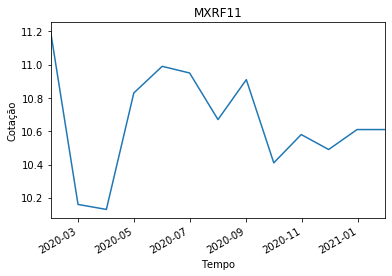

In [3]:
#2.0.0 - Cotação
mxrf11["Close"].plot()
plt.title("MXRF11")
plt.xlabel("Tempo")
plt.ylabel("Cotação")

In [5]:
#3.0.0 - Isolando valores do DataFrame fornecidos pelo YF.
# Essa parte serve para isolar o último valor do DF (iloc[-1]) e separando a coluna Close .values[-4] para poder exibir o número como um parâmetro float.
x = mxrf11.iloc[-1].values[4]
print(x)
type(x)

10.609999656677246


numpy.float64

In [6]:
#4.0.0 - Preenchendo uma lista com os últimos valores da coluna Close
xs = []
i = -1
while not (i==(-5)):
    xs.append(mxrf11.iloc[i].values[4])
    i=i-1
print(xs)
type(xs)
type(mxrf11) #Conferindo o tipo de dado resgatado pela biblioteca padas_datareader

[10.609999656677246, 10.609999656677246, 10.489999771118164, 10.579999923706055]


pandas.core.frame.DataFrame

In [8]:
#Dados inseridos manualmente pelo usuário para calcular informações releventes sobre o DY e sobre os proventos recebidos.
#Vou usar essas informações para exibir informações na tela sobre o Dividend Yield, sobre os proventos recebidos de forma unitária e sobre a quantidade de proventos que vão ser recebidos a partir de uma quantia X investida
# Assim como saber quanto é necessário investir para receber uma quantia Y em provento. Todas essas informações com base nas informações geradas pela tabela
# 4.0.0 - O primeiro passo é exibir o máximo de informações para o usuário na tela, através de indexações das variáveis dentro do texto.
print(f'Este é o valor do último fechamento : {x:.2f} R$')
provento = 0.08
print(f'Este é o valor do último provento :{provento :.2f}R$')
DY = provento/x
print(f'Dividend Yield : {DY*100: .2f}%')
# Esta é minha quantidade de cotas
Eutenho = 46
print(f'Atualmente, eu estou com {Eutenho:.1f} cotas')
TotalInvestido = Eutenho*x
print(f'Isso tem me dado um total de {Eutenho*provento:.2f} reais por mês')
print(f'Apenas por curiosidade, essa quantia de cotas me geraria um total de {Eutenho*provento*12:.2f} reais por ano')
print(f'Novamente por curiosidade, essa quantia de cotas me geraria um total de {Eutenho*provento/30:.2f} reais por dia')

Este é o valor do último fechamento : 10.61 R$
Este é o valor do último provento :0.08R$
Dividend Yield :  0.75%
Atualmente, eu estou com 46.0 cotas
Isso tem me dado um total de 3.68 reais por mês
Apenas por curiosidade, essa quantia de cotas me geraria um total de 44.16 reais por ano
Novamente por curiosidade, essa quantia de cotas me geraria um total de 0.12 reais por dia


In [11]:
# 2.0.1 - Salário Mínimo em Proventos com base na cotação dada
SalarioMinimo = 1045
X = SalarioMinimo*x
Xp = X/provento
print(f'São necessários um total de {X: .2f}R$ investidos para se alcançar o salário mínimo')
print (f'Isso nos dá um total de {Xp * provento:.0f} cotas')

São necessários um total de  11087.45R$ investidos para se alcançar o salário mínimo


NameError: name 'Y' is not defined

In [ ]:
# Quantas cotas é possível comprar com 1 milhão de reias?
QuantasCotasPra1Milhao=1000000/x
print(f' Você precisa ter {QuantasCotasPra1Milhao:.1f} pra ter 1 milhão de reais nesse ativo')
print(f' {QuantasCotasPra1Milhao:.1f} cotas vão te gerar o total de {QuantasCotasPra1Milhao*Provento:.2f} reais mensais')

In [ ]:
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end=today)
xplg11 = web.get_data_yahoo('xplg11.SA', start='2020-02-01', end=today)
bcff11 = web.get_data_yahoo('bcff11.SA', start='2020-02-01', end=today)

In [134]:
#As variáveis com terminação p indicam o cálculo do Provento * Fechamento ajustado do último dia.
y = knri11.iloc[-1].values[4]
Y = SalarioMinimo*y
print(f'Este foi o último fechamento do KNRI {y:.2f}')
type(y)
z = xplg11.iloc[-1].values[4]
Z = SalarioMinimo*z
print(f'Este foi o último fechamento do XPLG11 {z:.2f}')
type(z)
w = bcff11.iloc[-1].values[4]
W = SalarioMinimo*w
Wp = W
print(f'Este foi o último fechamento do BCF11 {w:.2f}')
type(w)

print('Esses são os valores dos últimos proventos')
#As variáveis com terminação N indicam o último provento recebido por determinada cota
yn = 0.65 
wn = 0.50 
zn = 0.58
# 2.0.1 - Salário Mínimo em Proventos com base na cotação dada
SalarioMinimo = 1045
ym = x1/yn
wm = x2/wn
zm = x3/zn 
print(f'São necessários um total de {ym: .2f}R$ investidos em KNRI11 para se alcançar o salário mínimo em proventos')
print(f'São necessários um total de {wm: .2f}R$ investidos em BCFF11 para se alcançar o salário mínimo em proventos')
print(f'São necessários um total de {zm: .2f}R$ investidos em XPLG11 para se alcançar o salário mínimo em proventos')
print (f'Isso nos dá um total de {Y * Provento:.0f} cotas')

Este foi o último fechamento do KNRI 159.50
Este foi o último fechamento do XPLG11 121.40
Este foi o último fechamento do BCF11 92.00
Esses são os valores dos últimos proventos
São necessários um total de  256426.92R$ investidos em KNRI11 para se alcançar o salário mínimo em proventos
São necessários um total de  192280.00R$ investidos em BCFF11 para se alcançar o salário mínimo em proventos
São necessários um total de  218729.31R$ investidos em XPLG11 para se alcançar o salário mínimo em proventos
Isso nos dá um total de 13334 cotas


In [135]:
# Agora um pequeno comparativo com outros FIIs da carteira
print(f'Este é o valor do último fechamento do KNRI {y:.2f} R$, do BCFF11{w:.2f} R$ e do XPLG {z:.2f}R$')
print(f'Este é o valor do último provento do KNRI :{yn :.2f}R$ do BCFF11 {wn :.2f} e do XPLG {zn :.2f}')
dyknri11 = yn/knri11close
dybcff11 = wn/bcff11close
dyxplg11 = zn/xplg11close
print(f'Dividend Yield do KNRI : {dyknri11*100: .2f}%, do BCFF11 {dybcff11*100:.2f}% do XPLG11 {dyxplg11*100:.2f}%')

Este é o valor do último fechamento do KNRI 159.50 R$, do BCFF1192.00 R$ e do XPLG 121.40R$
Este é o valor do último provento do KNRI :0.65R$ do BCFF11 0.50 e do XPLG 0.58
Dividend Yield do KNRI :  0.41%, do BCFF11 0.54% do XPLG11 0.48%
